# 《人工智能原理》课程实验1：paddle深度学习框架安装和使用

* **姓名：**付义茂

* **学号：**120524046

* **班级：**20级医学信息工程

---

## 实验目的
1. 掌握飞桨框架的安装和配置方法；
2. 掌握深度学习模型开发的基本步骤
3. 使用Python和numpy实现波士顿房价预测模型
4. 使用飞桨框架实现波士顿房价预测模型

---

## 实验原理



---
## 实验内容

1. 根据飞桨官网的[安装教程](https://www.paddlepaddle.org.cn/install/quick?docurl=/documentation/docs/zh/install/pip/macos-pip.html)在本地机器安装飞桨框架，通过如下命令验证安装是否成功：
* 使用python命令进入python解释器，输入import paddle，验证安装是否成功。
* 输入paddle.__version__验证版本安装是否正确。
* 输入paddle.utils.run_check()，如出现“PaddlePaddle is installed successfully!”，则说明已正确安装。
* 将以上三题完成后截图粘贴到实验报告册中。

**注意：**如果您的机器配置的是Nvidia显卡，请参考https://blog.csdn.net/weixin_46569877/article/details/121508939 安装CUDA和Cudnn后，安装对应的GPU版本paddle，如果你的机器配置的不是Nvidia显卡，请安装CPU版本的paddle。

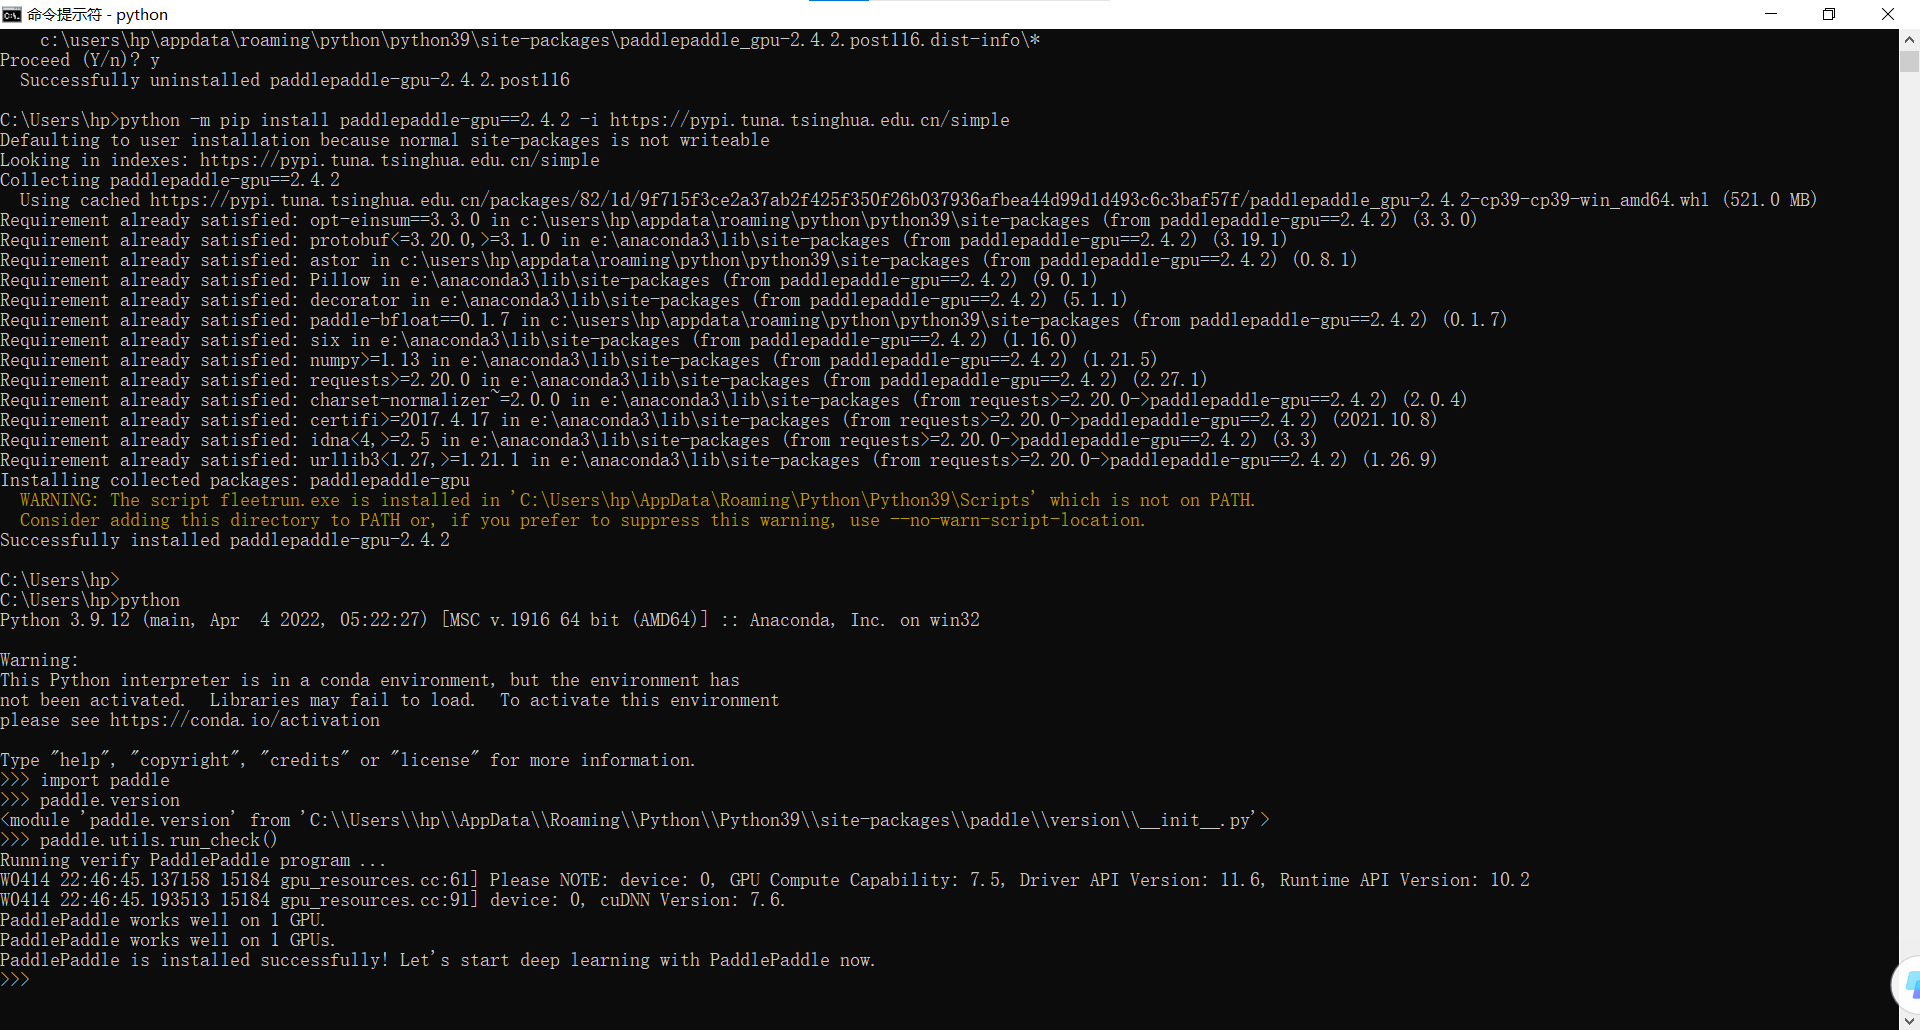

2. 运行a = paddle.arange(start=0, end=6, step=2)，会得到什么结果？将答案粘贴到实验报告册中，并进行分析。

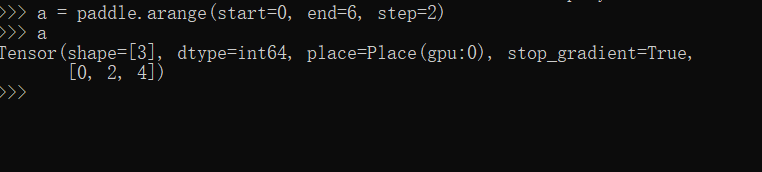

3. 参考课堂程序，使用Python和numpy实现波士顿房价预测模型。

# 用Python和Numpy构建神经网络模型


## 波士顿房价预测任务

波士顿房价预测是一个经典的机器学习任务，类似于程序员世界的“Hello World”。和大家对房价的普遍认知相同，波士顿地区的房价受诸多因素影响。该数据集统计了13种可能影响房价的因素和该类型房屋的均价，期望构建一个基于13个因素进行房价预测的模型，如 **图1** 所示。

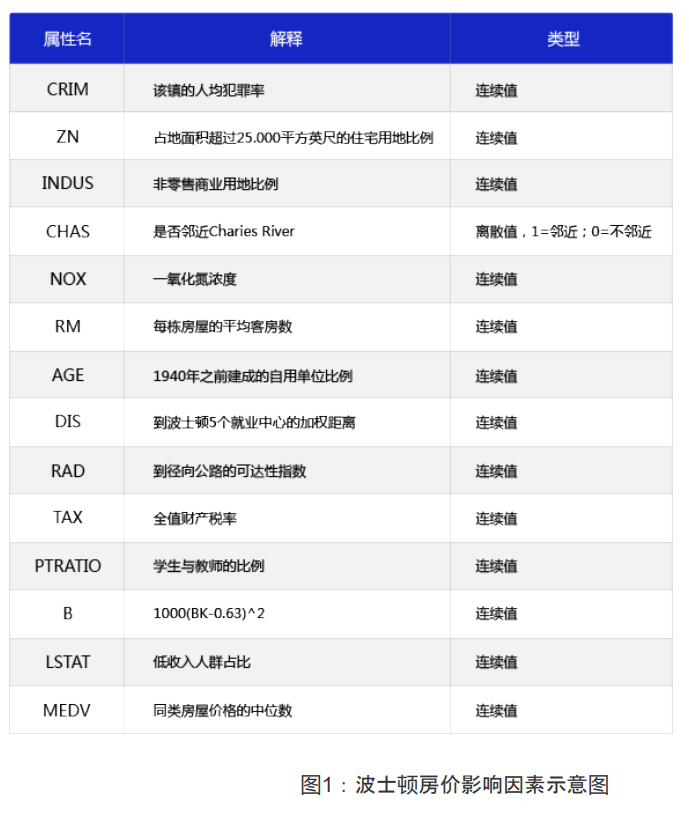

## 线性回归模型

假设房价和各影响因素之间能够用线性关系来描述：

$$y=\sum^{n}_{j=1}x_j \omega_j+b $$

模型的求解即是通过数据拟合出每个wj和b。其中，wj和b分别表示该线性模型的权重和偏置。<br>
一维情况下，wj 和 b 是直线的斜率和截距。<br>
线性回归模型使用均方误差作为（Mean Squared Error，MSE）损失函数（Loss），用以衡量预测房价和真实房价的差异，公式如下：
$$MSE=\frac{1}{m}\sum^{m}_{i=1}(\hat{y}_i-y_i)^2 $$

## 线性回归模型的神经网络结构

神经网络的标准结构中每个神经元由加权和与非线性变换构成，然后将多个神经元分层的摆放并连接形成神经网络。线性回归模型可以认为是神经网络模型的一种极简特例，是一个只有加权和、没有非线性变换的神经元（无需形成网络），如 **图2** 所示。

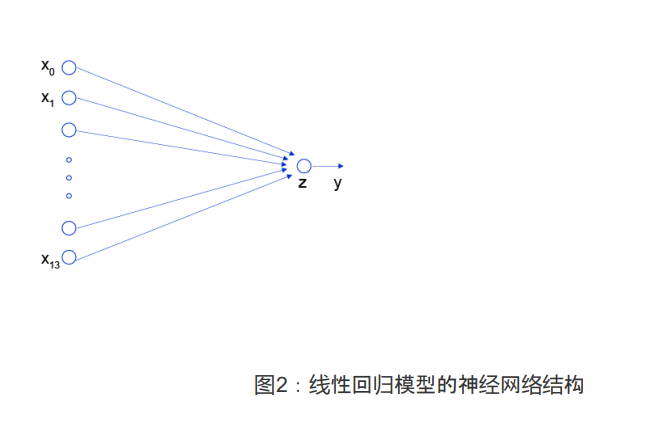

## 基于线性回归实现波士顿房价预测任务

深度学习不仅实现了模型的端到端学习，还推动了人工智能进入工业大生产阶段，产生了标准化、自动化和模块化的通用框架。不同场景的深度学习模型具备一定的通用性，五个步骤即可完成模型的构建和训练，如 图3 所示。


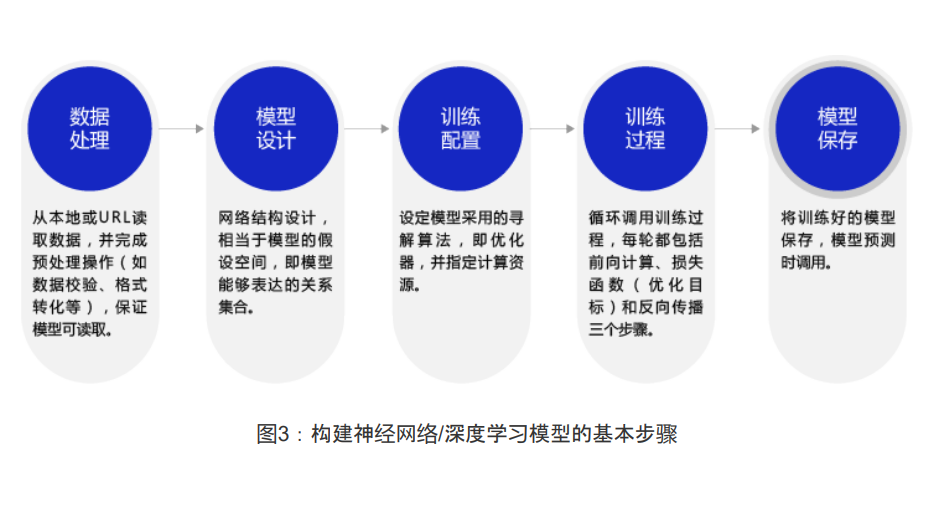

正是由于深度学习的建模和训练的过程存在通用性，即在构建不同的模型时，只有模型三要素不同，其它步骤基本一致，才产生了深度学习框架来加速建模。

### 数据处理

数据处理包含五个部分：数据导入、数据形状变换、数据集划分、数据归一化处理和封装 load data 函数。数据预处理后，才能被模型调用。

#### (1) 数据读取

通过如下代码读入数据，了解下波士顿房价的数据集结构，数据存放在data目录下housing.data文件中。

In [1]:
# 导入需要用到的package
import numpy as np
import matplotlib.pyplot as plt
import json
# 读入训练数据
datafile = './data/housing.data'
data = np.fromfile(datafile, sep=' ')
print(data)
print(data.shape)

[6.320e-03 1.800e+01 2.310e+00 ... 3.969e+02 7.880e+00 1.190e+01]
(7084,)


#### （2）数据形状变换

由于读入的原始数据是1维的，所有数据都连在一起。因此需要我们将数据的形状进行变换，形成一个2维的矩阵，每行为一个数据样本（14个值），每个数据样本包含13个x（影响房价的特征）和一个y（该类型房屋的均价）。

In [2]:
# 读入之后的数据被转化成1维array，其中array的第0-13项是第一条数据，第14-27项是第二条数据，以此类推....
# 这里对原始数据做reshape，变成N x 14的形式
feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS',
'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
feature_num = len(feature_names)
data = data.reshape([data.shape[0] // feature_num, feature_num])

In [3]:
data.shape

(506, 14)

In [4]:
# 查看数据
x = data[0]
print(x.shape)
print(x)

(14,)
[6.320e-03 1.800e+01 2.310e+00 0.000e+00 5.380e-01 6.575e+00 6.520e+01
 4.090e+00 1.000e+00 2.960e+02 1.530e+01 3.969e+02 4.980e+00 2.400e+01]


#### （3）数据集划分


在本案例中，我们将80%的数据用作训练集，20%用作测试集，实现代码如下。通过打印训练
集的形状，可以发现共有404个样本，每个样本含有13个特征和1个预测值。

In [5]:
ratio = 0.8
offset = int(data.shape[0] * ratio)
training_data = data[:offset]
training_data.shape

(404, 14)

#### （4）数据归一化处理


对每个特征进行归一化处理，使得每个特征的取值缩放到0~1之间。这样做有两个好处：一是模
型训练更高效；二是特征前的权重大小可以代表该变量对预测结果的贡献度（因为每个特征值本
身的范围相同）。


In [6]:
# 计算train数据集的最大值，最小值
maximums, minimums = \
                    training_data.max(axis=0), \
                    training_data.min(axis=0),
# 对数据进行归一化处理
for i in range(feature_num):
    data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])

#### （5）封装成load data函数


将上述几个数据处理操作封装成 load data 函数，以便下一步模型的调用，实现方法如下。


In [7]:
def load_data():
    # 从文件导入数据
    datafile = './data/housing.data'
    data = np.fromfile(datafile, sep=' ')
    
    # 每条数据包括14项，其中前面13项是影响因素，第14项是相应的房屋价格中位数
    feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', \
                        'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
    feature_num = len(feature_names)
    
    # 将原始数据进行Reshape，变成[N, 14]这样的形状
    data = data.reshape([data.shape[0] // feature_num, feature_num])
    
    # 将原数据集拆分成训练集和测试集
    # 这里使用80%的数据做训练，20%的数据做测试
    # 测试集和训练集必须是没有交集的
    ratio = 0.8
    offset = int(data.shape[0] * ratio)
    training_data = data[:offset]
    
    # 计算训练集的最大值，最小值
    maximums, minimums = training_data.max(axis=0), \
                            training_data.min(axis=0)
    # 对数据进行归一化处理
    
    for i in range(feature_num):
        data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])
        
    # 训练集和测试集的划分比例
    training_data = data[:offset]
    test_data = data[offset:]
    return training_data, test_data

In [8]:
# 获取数据
training_data, test_data = load_data()
x = training_data[:, :-1]
y = training_data[:, -1:]

In [9]:
# 查看数据
print(x[0])
print(y[0])

[0.         0.18       0.07344184 0.         0.31481481 0.57750527
 0.64160659 0.26920314 0.         0.22755741 0.28723404 1.
 0.08967991]
[0.42222222]


### 模型设计


<p>模型设计是深度学习模型关键要素之一，也称为网络结构设计，相当于模型的假设空间，即实现
模型“前向计算”（从输入到输出）的过程。</p>

<p>如果将输入特征和输出预测值均以向量表示，输入特征x有13个向量，y有1个向量，那么参数权
重的形状是13 × 1。假设我们以如下任意数字赋值参数做初始化：</p>


In [10]:
w = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, -0.1, -0.2, -0.3, -0.4, 0.0]
w = np.array(w).reshape([13, 1])

In [11]:
x1=x[0]
t = np.dot(x1, w)
print(t)

[0.69474855]


完整的线性回归公式，还需要初始化偏移量b，同样随意赋初值-0.2。那么，线性回归模型的完
整输出是z = t + b，这个从特征和参数计算输出值的过程称为“前向计算”。


In [12]:
b = -0.2
z = t + b
print(z)

[0.49474855]


将上述计算预测输出的过程以“类和对象”的方式来描述，类成员变量有参数w和b。通过写一
个 forward 函数（代表“前向计算”）完成上述从特征和参数到输出预测值的计算过程，代码实现
如下。


In [13]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，
        # 此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z

基于Network类的定义，模型的计算过程如下所示。

In [14]:
net = Network(13)
x1 = x[0]
y1 = y[0]
z = net.forward(x1)
print(z)
print(y1)

[2.39362982]
[0.42222222]


### 训练配置


模型设计完成后，需要通过训练配置寻找模型的最优值，即通过损失函数来衡量模型的好坏。训
练配置也是深度学习模型关键要素之一。


<p>通过模型计算x1表示的影响因素所对应的房价应该是z, 但实际数据告诉我们房价是y。这时我们
需要有某种指标来衡量预测值z跟真实值y之间的差距。对于回归问题，最常采用的衡量方法是
使用均方误差作为评价模型好坏的指标，公式为</p>

$$loss=(y-z)^2$$

上式中的Loss通常也被称作损失函数，它是衡量模型好坏的指标。在回归问题中常用均方误差
作为损失函数，而在分类问题中常用采用交叉熵（Cross-Entropy）作为损失函数.

In [15]:
Loss = (y1 - z)*(y1 - z)
print(Loss)

[3.88644793]


<p>因为计算损失函数时需要把每个样本的损失函数值都考虑到，所以我们需要对单个样本的损失函
数进行求和，并除以样本总数m。公式为
</p>
$$loss= \frac{1}{m} \sum^{m}_{i=1}(y_i-z_i)^2 $$
在Network类下面添加损失函数的代码实现如下：


In [16]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    def loss(self, z, y):
        error = z - y
        cost = error * error
        cost = np.mean(cost)
        return cost

使用定义的Network类，可以方便的计算预测值和损失函数。需要注意的是，类中的变量x, w，
b, z, error等均是向量。以变量x为例，共有两个维度，一个代表特征数量（值为13），一个代
表样本数量，代码如下所示。


In [17]:
net = Network(13)
# 此处可以一次性计算多个样本的预测值和损失函数
x1 = x[0:3]
y1 = y[0:3]
z = net.forward(x1)
print('predict: ', z)
loss = net.loss(z, y1)
print('loss:', loss)

predict:  [[2.39362982]
 [2.46752393]
 [2.02483479]]
loss: 3.3844969926127924


### 训练过程


训练过程是深度学习模型的关键
要素之一，其目标是让定义的损失函数尽可能的小，也就是说找到一个参数解w和b，使得损失
函数取得极小值。

（1）梯度下降法

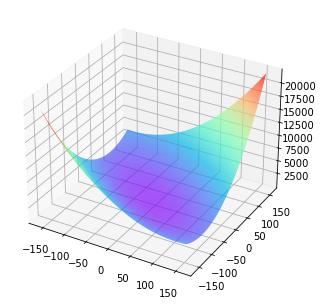

In [18]:
net = Network(13)
losses = []
#只画出参数w5和w9在区间[-160, 160]的曲线部分，以及包含损失函数的极值
w5 = np.arange(-160.0, 160.0, 1.0)
w9 = np.arange(-160.0, 160.0, 1.0)
losses = np.zeros([len(w5), len(w9)])

#计算设定区域内每个参数取值所对应的Loss
for i in range(len(w5)):
    for j in range(len(w9)):
        net.w[5] = w5[i]
        net.w[9] = w9[j]
        z = net.forward(x)
        loss = net.loss(z, y)
        losses[i, j] = loss
            
#使用matplotlib将两个变量和对应的Loss作3D图
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
w5, w9 = np.meshgrid(w5, w9)
ax.plot_surface(w5, w9, losses, rstride=1, cstride=1, cmap='rainbow')
plt.show()

（2）计算梯度

上面我们讲过了损失函数的计算方法，这里稍微改写，为了使梯度计算更加简洁，引入因子$\frac{1}{2}$，
定义损失函数如下：


$$l= \frac{1}{2m} \sum^{m}_{i=1}(y_i-z_i)^2 $$

其中zi是网络对第i个样本的预测值：
$$z_i=\sum^{12}_{i=0}x_i^j \bullet\omega_i^j+b $$

In [19]:
x1 = x[0]
y1 = y[0]
z1 = net.forward(x1)
print('x1 {}, shape {}'.format(x1, x1.shape))
print('y1 {}, shape {}'.format(y1, y1.shape))
print('z1 {}, shape {}'.format(z1, z1.shape))

x1 [0.         0.18       0.07344184 0.         0.31481481 0.57750527
 0.64160659 0.26920314 0.         0.22755741 0.28723404 1.
 0.08967991], shape (13,)
y1 [0.42222222], shape (1,)
z1 [130.86954441], shape (1,)


In [20]:
gradient_w0 = (z1 - y1) * x1[0]
print('gradient_w0 {}'.format(gradient_w0))

gradient_w0 [0.]


In [21]:
gradient_w1 = (z1 - y1) * x1[1]
print('gradient_w1 {}'.format(gradient_w1))


gradient_w1 [23.48051799]


In [22]:
gradient_w2= (z1 - y1) * x1[2]
print('gradient_w2 {}'.format(gradient_w2))

gradient_w2 [9.58029163]


（3）使用Numpy进行梯度计算


基于Numpy广播机制（对向量和矩阵计算如同对1个单一变量计算一样），可以更快速的实现梯
度计算。计算梯度的代码中直接用(z1 − y1) ⋅ x1，得到的是一个13维的向量，每个分量分别代
表该维度的梯度。

In [23]:
gradient_w = (z1 - y1) * x1
print('gradient_w_by_sample1 {}, gradient.shape {}'.format(gradient_w, gradient_w.shape))


gradient_w_by_sample1 [  0.          23.48051799   9.58029163   0.          41.06674958
  75.33401592  83.69586171  35.11682862   0.          29.68425495
  37.46891169 130.44732219  11.69850434], gradient.shape (13,)


输入数据中有多个样本，每个样本都对梯度有贡献。如上代码计算了只有样本1时的梯度值，同
样的计算方法也可以计算样本2和样本3对梯度的贡献。

In [24]:
x2 = x[1]
y2 = y[1]
z2 = net.forward(x2)
gradient_w = (z2 - y2) * x2
print('gradient_w_by_sample2 {}, gradient.shape {}'.format(gradient_w, gradient_w.shape))

gradient_w_by_sample2 [2.54738434e-02 0.00000000e+00 2.83333765e+01 0.00000000e+00
 1.86624242e+01 5.91703008e+01 8.45121992e+01 3.76793284e+01
 4.69458498e+00 1.23980167e+01 5.97311025e+01 1.07975454e+02
 2.20777626e+01], gradient.shape (13,)


In [25]:
x3 = x[2]
y3 = y[2]
z3 = net.forward(x3)
gradient_w = (z3 - y3) * x3
print('gradient_w_by_sample3 {}, gradient.shape {}'.format(gradient_w, gradient_w.shape))

gradient_w_by_sample3 [3.07963708e-02 0.00000000e+00 3.42860463e+01 0.00000000e+00
 2.25832858e+01 9.07287666e+01 7.83155260e+01 4.55955257e+01
 5.68088867e+00 1.50027645e+01 7.22802431e+01 1.29029688e+02
 8.29246719e+00], gradient.shape (13,)


可能有的同学再次想到可以使用for循环把每个样本对梯度的贡献都计算出来，然后再作平均。
但是我们不需要这么做，仍然可以使用Numpy的矩阵操作来简化运算，如3个样本的情况

In [26]:
# 注意这里是一次取出3个样本的数据，不是取出第3个样本
x3samples = x[0:3]
y3samples = y[0:3]
z3samples = net.forward(x3samples)
print('x {}, shape {}'.format(x3samples, x3samples.shape))
print('y {}, shape {}'.format(y3samples, y3samples.shape))
print('z {}, shape {}'.format(z3samples, z3samples.shape))


x [[0.00000000e+00 1.80000000e-01 7.34418420e-02 0.00000000e+00
  3.14814815e-01 5.77505269e-01 6.41606591e-01 2.69203139e-01
  0.00000000e+00 2.27557411e-01 2.87234043e-01 1.00000000e+00
  8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.62405717e-01 0.00000000e+00
  1.72839506e-01 5.47997701e-01 7.82698249e-01 3.48961980e-01
  4.34782609e-02 1.14822547e-01 5.53191489e-01 1.00000000e+00
  2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.62405717e-01 0.00000000e+00
  1.72839506e-01 6.94385898e-01 5.99382080e-01 3.48961980e-01
  4.34782609e-02 1.14822547e-01 5.53191489e-01 9.87519166e-01
  6.34657837e-02]], shape (3, 13)
y [[0.42222222]
 [0.36888889]
 [0.66      ]], shape (3, 1)
z [[130.86954441]
 [108.34434338]
 [131.3204395 ]], shape (3, 1)


上面的x3samples, y3samples, z3samples的第一维大小均为3，表示有3个样本。下面计算这3
个样本对梯度的贡献。

In [27]:
gradient_w = (z3samples - y3samples) * x3samples
print('gradient_w {}, gradient.shape {}'.format(gradient_w, gradient_w.shape))


gradient_w [[0.00000000e+00 2.34805180e+01 9.58029163e+00 0.00000000e+00
  4.10667496e+01 7.53340159e+01 8.36958617e+01 3.51168286e+01
  0.00000000e+00 2.96842549e+01 3.74689117e+01 1.30447322e+02
  1.16985043e+01]
 [2.54738434e-02 0.00000000e+00 2.83333765e+01 0.00000000e+00
  1.86624242e+01 5.91703008e+01 8.45121992e+01 3.76793284e+01
  4.69458498e+00 1.23980167e+01 5.97311025e+01 1.07975454e+02
  2.20777626e+01]
 [3.07963708e-02 0.00000000e+00 3.42860463e+01 0.00000000e+00
  2.25832858e+01 9.07287666e+01 7.83155260e+01 4.55955257e+01
  5.68088867e+00 1.50027645e+01 7.22802431e+01 1.29029688e+02
  8.29246719e+00]], gradient.shape (3, 13)


<p>此处可见，计算梯度 gradient_w 的维度是3 × 13，并且其第1行与上面第1个样本计算的梯度
gradient_w_by_sample1一致，第2行与上面第2个样本计算的梯度gradient_w_by_sample2一
致，第3行与上面第3个样本计算的梯度gradient_w_by_sample3一致。这里使用矩阵操作，可以
更加方便的对3个样本分别计算各自对梯度的贡献。</p>
<p>那么对于有N个样本的情形，我们可以直接使用如下方式计算出所有样本对梯度的贡献，这就是
使用Numpy库广播功能带来的便捷。</p>
<p>小结一下这里使用Numpy库的广播功能：</p>
<p>• 一方面可以扩展参数的维度，代替for循环来计算1个样本对从w0到w12的所有参数
的梯度。</p>
<p>• 另一方面可以扩展样本的维度，代替for循环来计算样本0到样本403对参数的梯度。</p>


In [28]:
z = net.forward(x)
gradient_w = (z - y) * x
print('gradient_w shape {}'.format(gradient_w.shape))
print(gradient_w)


gradient_w shape (404, 13)
[[0.00000000e+00 2.34805180e+01 9.58029163e+00 ... 3.74689117e+01
  1.30447322e+02 1.16985043e+01]
 [2.54738434e-02 0.00000000e+00 2.83333765e+01 ... 5.97311025e+01
  1.07975454e+02 2.20777626e+01]
 [3.07963708e-02 0.00000000e+00 3.42860463e+01 ... 7.22802431e+01
  1.29029688e+02 8.29246719e+00]
 ...
 [3.97706874e+01 0.00000000e+00 1.74130673e+02 ... 2.01043762e+02
  2.48659390e+02 1.27554582e+02]
 [2.69696515e+01 0.00000000e+00 1.75225687e+02 ... 2.02308019e+02
  2.34270491e+02 1.28287658e+02]
 [6.08972123e+01 0.00000000e+00 1.53017134e+02 ... 1.76666981e+02
  2.18509161e+02 1.08772220e+02]]


上面gradient_w的每一行代表了一个样本对梯度的贡献。根据梯度的计算公式，总梯度是对每个
样本对梯度贡献的平均值。

$$\frac{\partial{l}}{\partial{w_j}}= \frac{1}{m} \sum^{m}_{i=1}(z_i-y_i)\frac{\partial{z_i}}{\partial{w_j}}=\frac{1}{m} \sum^{m}_{i=1}(z_i-y_i)x_i^j$$

我们也可以使用Numpy的均值函数来完成此过程：

In [29]:
# axis = 0 表示把每一行做相加然后再除以总的行数
gradient_w = np.mean(gradient_w, axis=0)
print('gradient_w ', gradient_w.shape)
print('w ', net.w.shape)
print(gradient_w)
print(net.w)

gradient_w  (13,)
w  (13, 1)
[  4.6555403   19.35268996  55.88081118  14.00266972  47.98588869
  76.87210821  94.8555119   36.07579608  45.44575958  59.65733292
  83.65114918 134.80387478  38.93998153]
[[ 1.76405235e+00]
 [ 4.00157208e-01]
 [ 9.78737984e-01]
 [ 2.24089320e+00]
 [ 1.86755799e+00]
 [ 1.59000000e+02]
 [ 9.50088418e-01]
 [-1.51357208e-01]
 [-1.03218852e-01]
 [ 1.59000000e+02]
 [ 1.44043571e-01]
 [ 1.45427351e+00]
 [ 7.61037725e-01]]


我们使用Numpy的矩阵操作方便地完成了gradient的计算，但引入了一个问题， gradient_w 的
形状是(13,)，而w的维度是(13, 1)。导致该问题的原因是使用 np.mean 函数时消除了第0维。为
了加减乘除等计算方便， gradient_w 和w必须保持一致的形状。因此我们将 gradient_w 的维度
也设置为(13,1)，代码如下：

In [30]:
gradient_w = gradient_w[:, np.newaxis]
print('gradient_w shape', gradient_w.shape)

gradient_w shape (13, 1)


综合上面的剖析，计算梯度的代码如下所示。

In [31]:
z = net.forward(x)
gradient_w = (z - y) * x
gradient_w = np.mean(gradient_w, axis=0)
gradient_w = gradient_w[:, np.newaxis]
gradient_w


array([[  4.6555403 ],
       [ 19.35268996],
       [ 55.88081118],
       [ 14.00266972],
       [ 47.98588869],
       [ 76.87210821],
       [ 94.8555119 ],
       [ 36.07579608],
       [ 45.44575958],
       [ 59.65733292],
       [ 83.65114918],
       [134.80387478],
       [ 38.93998153]])

上述代码非常简洁地完成了w的梯度计算。同样，计算b的梯度的代码也是类似的原理。


In [32]:
gradient_b = (z - y)
gradient_b = np.mean(gradient_b)
# 此处b是一个数值，所以可以直接用np.mean得到一个标量
gradient_b

142.50289323156107

将上面计算w和b的梯度的过程，写成Network类的 gradient 函数，实现方法如下所示。

In [33]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    def gradient(self, x, y):
        z = self.forward(x)
        gradient_w = (z-y)*x
        gradient_w = np.mean(gradient_w, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = (z - y)
        gradient_b = np.mean(gradient_b)
        return gradient_w, gradient_b

In [34]:
# 调用上面定义的gradient函数，计算梯度
# 初始化网络
net = Network(13)
# 设置[w5, w9] = [-100., -100.]
net.w[5] = -100.0
net.w[9] = -100.0

z = net.forward(x)
loss = net.loss(z, y)
gradient_w, gradient_b = net.gradient(x, y)
gradient_w5 = gradient_w[5][0]
gradient_w9 = gradient_w[9][0]
print('point {}, loss {}'.format([net.w[5][0], net.w[9][0]], loss))
print('gradient {}'.format([gradient_w5, gradient_w9]))

point [-100.0, -100.0], loss 7873.345739941162
gradient [-45.87968288123222, -35.50236884482904]


（4）确定损失函数更小的点


下面我们开始研究更新梯度的方法。首先沿着梯度的反方向移动一小步，找到下一个点P1，观
察损失函数的变化。

In [35]:
# 在[w5, w9]平面上，沿着梯度的反方向移动到下一个点P1
# 定义移动步长 eta
eta = 0.1
# 更新参数w5和w9
net.w[5] = net.w[5] - eta * gradient_w5
net.w[9] = net.w[9] - eta * gradient_w9
# 重新计算z和loss
z = net.forward(x)
loss = net.loss(z, y)
gradient_w, gradient_b = net.gradient(x, y)
gradient_w5 = gradient_w[5][0]
gradient_w9 = gradient_w[9][0]
print('point {}, loss {}'.format([net.w[5][0], net.w[9][0]], loss))
print('gradient {}'.format([gradient_w5, gradient_w9]))

point [-95.41203171187678, -96.4497631155171], loss 7214.694816482367
gradient [-43.883932999069096, -34.01927390849592]


运行上面的代码，可以发现沿着梯度反方向走一小步，下一个点的损失函数的确减少了。

在上述代码中，每次更新参数使用的语句：
net.w[5] = net.w[5] - eta * gradient_w5
<p>• 相减：参数需要向梯度的反方向移动。</p>
<p>• eta：控制每次参数值沿着梯度反方向变动的大小，即每次移动的步长，又称为学习
率。</p>


如 **图8** 所示，特征输入归一化后，不同参数输出的Loss是一个比较规整的曲线，学习率可以设
置成统一的值 ；特征输入未归一化时，不同特征对应的参数所需的步长不一致，尺度较大的参
数需要大步长，尺寸较小的参数需要小步长，导致无法设置统一的学习率

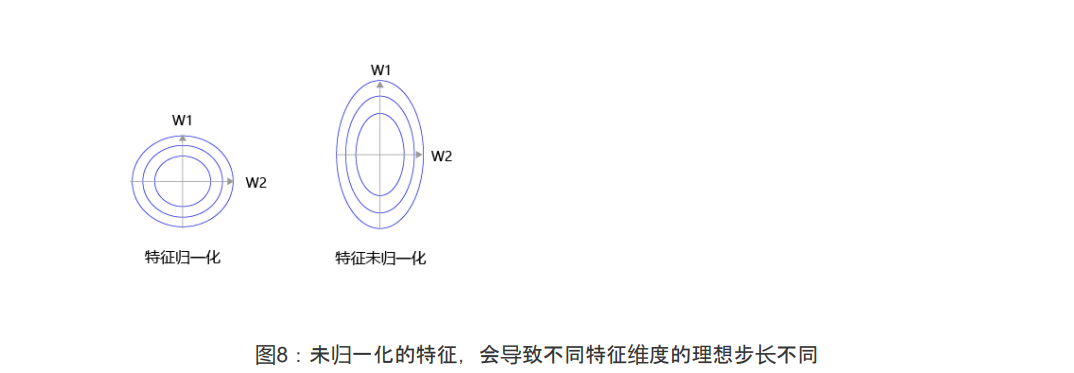

（5）代码封装Train函数


将上面的循环计算过程封装在 train 和 update 函数中，实现方法如下所示。

In [36]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights,1)
        self.w[5] = -100.
        self.w[9] = -100.
        self.b = 0.
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    def gradient(self, x, y):
        z = self.forward(x)
        gradient_w = (z-y)*x
        gradient_w = np.mean(gradient_w, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = (z - y)
        gradient_b = np.mean(gradient_b)
        return gradient_w, gradient_b
    def update(self, gradient_w5, gradient_w9, eta=0.01):
        net.w[5] = net.w[5] - eta * gradient_w5
        net.w[9] = net.w[9] - eta * gradient_w9
    def train(self, x, y, iterations=100, eta=0.01):
        points = []
        losses = []
        for i in range(iterations):
            points.append([net.w[5][0], net.w[9][0]])
            z = self.forward(x)
            L = self.loss(z, y)
            gradient_w, gradient_b = self.gradient(x, y)
            gradient_w5 = gradient_w[5][0]
            gradient_w9 = gradient_w[9][0]
            self.update(gradient_w5, gradient_w9, eta)
            losses.append(L)
            if i % 50 == 0:
                print('iter {}, point {}, loss {}'.format(i, [net.w[5][0], net.w[9][0]], L))
        return points, losses

iter 0, point [-99.54120317118768, -99.64497631155172], loss 7873.345739941162
iter 50, point [-78.9761810944732, -83.65939206734069], loss 5131.480704109405
iter 100, point [-62.4493631356931, -70.67918223434114], loss 3346.754494352463
iter 150, point [-49.17799206644332, -60.12620415441553], loss 2184.9060162706546
iter 200, point [-38.53070194231174, -51.533984751788346], loss 1428.4172504483342
iter 250, point [-29.998249130283174, -44.52613603923428], loss 935.739289424268
iter 300, point [-23.16990162451958, -38.79894318028118], loss 614.7592258739252
iter 350, point [-17.714392800837782, -34.10731848231335], loss 405.5340818447151
iter 400, point [-13.364557220746391, -30.253470630210863], loss 269.0551396220099
iter 450, point [-9.90493667738497, -27.077764259976597], loss 179.9364750604249
iter 500, point [-7.161782280775632, -24.451346444229817], loss 121.6571128549
iter 550, point [-4.994989383373882, -22.270198517465555], loss 83.46491706360904
iter 600, point [-3.29159169

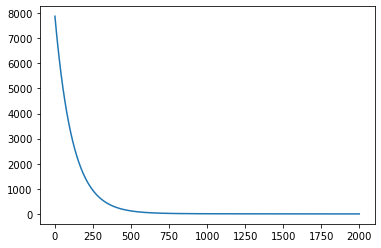

In [37]:
# 获取数据
train_data, test_data = load_data()
x = train_data[:, :-1]
y = train_data[:, -1:]

# 创建网络
net = Network(13)
num_iterations = 2000
# 启动训练
points, losses = net.train(x, y, iterations=num_iterations, eta=0.01)

# 画出损失函数的变化趋势
plot_x = np.arange(num_iterations)
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

（6）训练扩展到全部参数


为了能给读者直观的感受，上面演示的梯度下降的过程仅包含w5和w9两个参数，但房价预测的
完整模型，必须要对所有参数w和b进行求解。这需要将Network中的 update 和 train 函数进行
修改。由于不再限定参与计算的参数（所有参数均参与计算），修改之后的代码反而更加简洁。
实现逻辑：“前向计算输出、根据输出和真实值计算Loss、基于Loss和输入计算梯度、根据梯度
更新参数值”四个部分反复执行，直到到损失函数最小。具体代码如下所示。

In [38]:
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    def gradient(self, x, y):
        z = self.forward(x)
        gradient_w = (z-y)*x
        gradient_w = np.mean(gradient_w, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = (z - y)
        gradient_b = np.mean(gradient_b)
        return gradient_w, gradient_b
    def update(self, gradient_w, gradient_b, eta = 0.01):
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b
    def train(self, x, y, iterations=100, eta=0.01):
        losses = []
        for i in range(iterations):
            z = self.forward(x)
            L = self.loss(z, y)
            gradient_w, gradient_b = self.gradient(x, y)
            self.update(gradient_w, gradient_b, eta)
            losses.append(L)
            if (i+1) % 10 == 0:
                print('iter {}, loss {}'.format(i, L))
        return losses


iter 9, loss 5.143394325795511
iter 19, loss 3.097924194225988
iter 29, loss 2.082241020617026
iter 39, loss 1.5673801618157397
iter 49, loss 1.2966204735077431
iter 59, loss 1.1453399043319765
iter 69, loss 1.05301557174352
iter 79, loss 0.9902292156463154
iter 89, loss 0.9426576903842502
iter 99, loss 0.9033048096880774
iter 109, loss 0.868732003041364
iter 119, loss 0.837229250968144
iter 129, loss 0.807927474161227
iter 139, loss 0.7803677341465796
iter 149, loss 0.7542920908532763
iter 159, loss 0.7295420168915829
iter 169, loss 0.7060090054240882
iter 179, loss 0.6836105084697766
iter 189, loss 0.6622781710179412
iter 199, loss 0.6419520361168637
iter 209, loss 0.6225776517869489
iter 219, loss 0.6041045903195836
iter 229, loss 0.5864856570315078
iter 239, loss 0.5696764374763877
iter 249, loss 0.5536350125932016
iter 259, loss 0.5383217588525027
iter 269, loss 0.5236991929680567
iter 279, loss 0.509731841376165
iter 289, loss 0.4963861247069634
iter 299, loss 0.48363025234390233

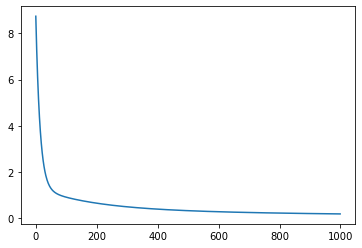

In [39]:
# 获取数据
train_data, test_data = load_data()
x = train_data[:, :-1]
y = train_data[:, -1:]
# 创建网络
net = Network(13)
num_iterations=1000
# 启动训练
losses = net.train(x,y, iterations=num_iterations, eta=0.01)

# 画出损失函数的变化趋势
plot_x = np.arange(num_iterations)
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

（7）随机梯度下降法（ Stochastic Gradient Descent）


在上述程序中，每次损失函数和梯度计算都是基于数据集中的全量数据。对于波士顿房价预测任
务数据集而言，样本数比较少，只有404个。但在实际问题中，数据集往往非常大，如果每次都
使用全量数据进行计算，效率非常低，通俗地说就是“杀鸡焉用牛刀”。由于参数每次只沿着梯度
反方向更新一点点，因此方向并不需要那么精确。一个合理的解决方案是每次从总的数据集中随
机抽取出小部分数据来代表整体，基于这部分数据计算梯度和损失来更新参数，这种方法被称作
随机梯度下降法（Stochastic Gradient Descent，SGD），核心概念如下：
<p>• minibatch：每次迭代时抽取出来的一批数据被称为一个minibatch。</p>
<p>• batch size：每个minibatch所包含的样本数目称为batch size。</p>
<p>• Epoch：当程序迭代的时候，按minibatch逐渐抽取出样本，当把整个数据集都遍历
到了的时候，则完成了一轮训练，也叫一个Epoch（轮次）。启动训练时，可以将
训练的轮数 num_epochs 和 batch_size 作为参数传入。</p>
下面结合程序介绍具体的实现过程，涉及到数据处理和训练过程两部分代码的修改。

1）数据处理需要实现拆分数据批次和样本乱序（为了实现随机抽样的效果）两个功能。

In [40]:
# 获取数据
train_data, test_data = load_data()
train_data.shape

(404, 14)

train_data中一共包含404条数据，如果batch_size=10，即取前0-9号样本作为第一个
minibatch，命名train_data1。

In [41]:
train_data1 = train_data[0:10]
train_data1.shape

(10, 14)

使用train_data1的数据（0-9号样本）计算梯度并更新网络参数。


In [42]:
net = Network(13)
x = train_data1[:, :-1]
y = train_data1[:, -1:]
loss = net.train(x, y, iterations=1, eta=0.01)
loss


[4.497480200683045]

再取出10-19号样本作为第二个minibatch，计算梯度并更新网络参数。


In [43]:
train_data2 = train_data[10:20]
x = train_data2[:, :-1]
y = train_data2[:, -1:]
loss = net.train(x, y, iterations=1, eta=0.01)
loss

[5.849682302465981]

按此方法不断的取出新的minibatch，并逐渐更新网络参数。

接下来，将train_data分成大吗小为batch size的多个minibatch，如下代码所示：将train_data分成
$\frac{404}{10}$+ 1 = 41 个 mini_batch，其中前40个mini_batch，每个均含有10个样本，最后一个
minibatch只含有4个样本。

In [44]:
# 获取数据
train_data, test_data = load_data()
# 打乱样本顺序
np.random.shuffle(train_data)
# 将train_data分成多个minibatch
batch_size = 10
n = len(train_data)
mini_batches = [train_data[k:k+batch_size] for k in range(0, n, batch_size)]
# 创建网络
net = Network(13)
# 依次使用每个mini_batch的数据
for mini_batch in mini_batches:
    x = mini_batch[:, :-1]
    y = mini_batch[:, -1:]
    loss = net.train(x, y, iterations=1)


另外，这里是按顺序读取minibatch，而SGD里面是随机抽取一部分样本代表总体。为了实现随
机抽样的效果，我们先将train_data里面的样本顺序随机打乱，然后再抽取minibatch。随机打乱
样本顺序，需要用到 np.random.shuffle 函数.

**说明：**

通过大量实验发现，模型对最后出现的数据印象更加深刻。训练数据导入后，越接近模型训练结
束，最后几个批次数据对模型参数的影响越大。为了避免模型记忆影响训练效果，需要进行样本
乱序操作。

In [45]:
# 新建一个array
a = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
print('before shuffle', a)
np.random.shuffle(a)
print('after shuffle', a)


before shuffle [ 1  2  3  4  5  6  7  8  9 10 11 12]
after shuffle [ 7  2 11  3  8  6 12  1  4  5 10  9]


多次运行上面的代码，可以发现每次执行 shuffle 函数后的数字顺序均不同。上面举的是一个1
维数组乱序的案例，我们再观察下2维数组乱序后的效果。


In [46]:
# 新建一个array
a = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
a = a.reshape([6, 2])
print('before shuffle\n', a)
np.random.shuffle(a)
print('after shuffle\n', a)


before shuffle
 [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]
after shuffle
 [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 9 10]
 [11 12]
 [ 7  8]]


观察运行结果可发现，数组的元素在第0维被随机打乱，但第1维的顺序保持不变。例如数字2仍
然紧挨在数字1的后面，数字8仍然紧挨在数字7的后面，而第二维的[3, 4]并不排在[1, 2]的后
面。将这部分实现SGD算法的代码集成到Network类中的 train 函数中，最终的完整代码如下。

In [47]:
# 获取数据
train_data, test_data = load_data()
# 打乱样本顺序
np.random.shuffle(train_data)
# 将train_data分成多个minibatch
batch_size = 10
n = len(train_data)
mini_batches = [train_data[k:k+batch_size] for k in range(0, n, batch_size)]
# 创建网络
net = Network(13)
# 依次使用每个mini_batch的数据
for mini_batch in mini_batches:
    x = mini_batch[:, :-1]
    y = mini_batch[:, -1:]
    loss = net.train(x, y, iterations=1)


2）训练过程代码修改。

将每个随机抽取的minibatch数据输入到模型中用于参数训练。训练过程
的核心是两层循环：
  <p>• 第一层循环，代表样本集合要被训练遍历几次，称为“epoch”，代码如下：
for epoch_id in range(num_epochs):
  <p>• 第二层循环，代表每次遍历时，样本集合被拆分成的多个批次，需要全部执行训
练，称为“iter (iteration)”，代码如下：
for iter_id,mini_batch in emumerate(mini_batches):


在两层循环的内部是经典的四步训练流程：前向计算->计算损失->计算梯度->更新参数，这与大
家之前所学是一致的，代码如下：


将两部分改写的代码集成到Network类中的 train 函数中，最终的实现如下:

In [48]:
import numpy as np
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w的初始值
        # 为了保持程序每次运行结果的一致性，此处设置固定的随机数种子
        #np.random.seed(0)
        self.w = np.random.randn(num_of_weights, 1)
        self.b = 0.
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self, x, y):
        z = self.forward(x)
        N = x.shape[0]
        gradient_w = 1. / N * np.sum((z-y) * x, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = 1. / N * np.sum(z-y)
        return gradient_w, gradient_b
    
    def update(self, gradient_w, gradient_b, eta = 0.01):
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b
        
    def train(self, training_data, num_epochs, batch_size=10, eta=0.01):
        n = len(training_data)
        losses = []
        for epoch_id in range(num_epochs):
            # 在每轮迭代开始之前，将训练数据的顺序随机打乱
            # 然后再按每次取batch_size条数据的方式取出
            np.random.shuffle(training_data)
            # 将训练数据进行拆分，每个mini_batch包含batch_size条的数据
            mini_batches = [training_data[k:k+batch_size] for k in range(0, n, batch_size)]
            for iter_id, mini_batch in enumerate(mini_batches):
                #print(self.w.shape)
                #print(self.b)
                x = mini_batch[:, :-1]
                y = mini_batch[:, -1:]
                a = self.forward(x)
                loss = self.loss(a, y)
                gradient_w, gradient_b = self.gradient(x, y)
                self.update(gradient_w, gradient_b, eta)
                losses.append(loss)
                print('Epoch {:3d} / iter {:3d}, loss = {:.4f}'.
                                format(epoch_id, iter_id, loss))
        return losses, self.w, self.b

Epoch   0 / iter   0, loss = 1.0281
Epoch   0 / iter   1, loss = 0.5048
Epoch   0 / iter   2, loss = 0.6382
Epoch   0 / iter   3, loss = 0.5168
Epoch   0 / iter   4, loss = 0.1951
Epoch   1 / iter   0, loss = 0.6281
Epoch   1 / iter   1, loss = 0.4611
Epoch   1 / iter   2, loss = 0.4520
Epoch   1 / iter   3, loss = 0.3961
Epoch   1 / iter   4, loss = 0.1381
Epoch   2 / iter   0, loss = 0.5642
Epoch   2 / iter   1, loss = 0.4250
Epoch   2 / iter   2, loss = 0.4480
Epoch   2 / iter   3, loss = 0.3881
Epoch   2 / iter   4, loss = 0.1884
Epoch   3 / iter   0, loss = 0.3921
Epoch   3 / iter   1, loss = 0.5582
Epoch   3 / iter   2, loss = 0.3759
Epoch   3 / iter   3, loss = 0.3849
Epoch   3 / iter   4, loss = 0.1425
Epoch   4 / iter   0, loss = 0.3821
Epoch   4 / iter   1, loss = 0.4382
Epoch   4 / iter   2, loss = 0.3864
Epoch   4 / iter   3, loss = 0.4314
Epoch   4 / iter   4, loss = 0.0471
Epoch   5 / iter   0, loss = 0.4264
Epoch   5 / iter   1, loss = 0.3829
Epoch   5 / iter   2, loss =

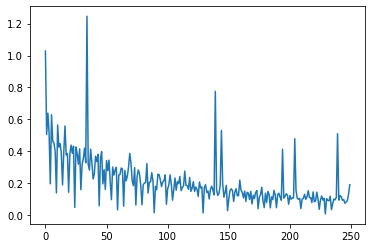

In [49]:
# 获取数据
train_data, test_data = load_data()
# 创建网络
net = Network(13)
# 启动训练
losses, w, b = net.train(train_data, num_epochs=50, batch_size=100, eta=0.1)
# 画出损失函数的变化趋势
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

In [50]:
w

array([[ 0.0124473 ],
       [ 0.33499361],
       [ 0.08992519],
       [ 0.22326041],
       [-0.35667059],
       [ 0.01982535],
       [-0.45854124],
       [-1.88849329],
       [-0.0674757 ],
       [ 0.26431525],
       [-0.31341141],
       [ 1.68321934],
       [-0.95141271]])

In [51]:
b

0.09433019662051009

In [52]:
z = net.forward(x)

In [53]:
z

array([[0.5458312 ],
       [0.51223662],
       [1.00773697],
       [0.45867173]])

观察上述损失函数的变化，随机梯度下降加快了训练过程，但由于每次仅基于少量样本更新参数
和计算损失ii，所以损失下降曲线会出现震荡。

***

**说明:**

由于房价预测的数据量过少，所以难以感受到随机梯度下降带来的性能提升。

***

### 总结

本节我们详细介绍了如何使用Numpy实现梯度下降算法，构建并训练了一个简单的线性模型实
现波士顿房价预测，可以总结出，使用神经网络建模房价预测有三个要点：  

<p>• 构建网络，初始化参数w和b，定义预测和损失函数的计算方法。<p/>
<p>• 随机选择初始点，建立梯度的计算方法和参数更新方式。<p/>
<p>• 将数据集的数据按batch size的大小分成多个minibatch，分别灌入模型计算梯度并
    更新参数，不断迭代直到损失函数几乎不再下降。<p/>

4. 参考课堂程序，使用飞桨框架重写波士顿预测模型。

# 使用飞桨实现波士顿房价预测任务


使用飞桨实现深度学习任务的流程基本一致，如**图1** 所示。

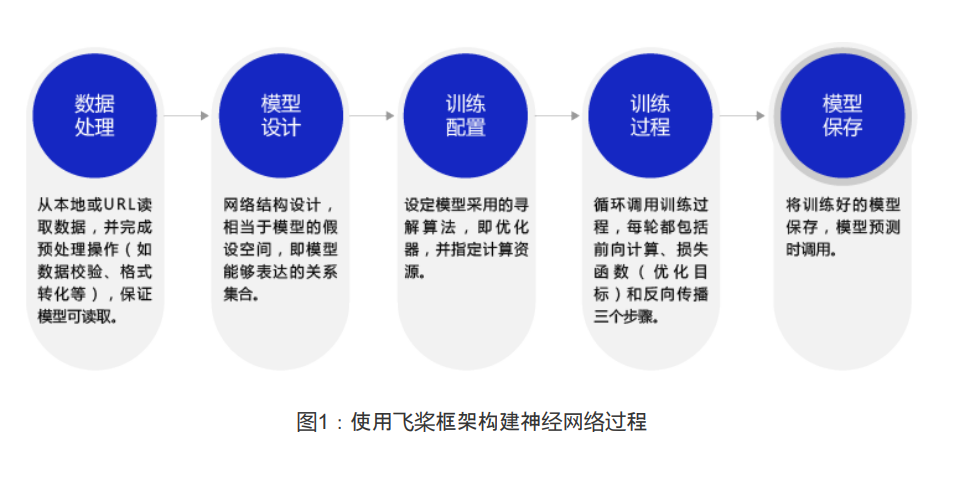

在数据处理之前，需要先加载飞桨框架的相关类库。

In [54]:
#加载飞桨、NumPy和相关类库
import paddle
from paddle.nn import Linear
import paddle.nn.functional as F
import numpy as np
import os
import random

## 说明

飞桨支持两种深度学习建模编写方式，更方便调试的动态图模式和性能更好并便于部署的静态图  
模式。
<p>• 动态图模式（命令式编程范式，类比Python）：解析式的执行方式。用户无需预先<br>
定义完整的网络结构，每写一行网络代码，即可同时获得计算结果；</p>
<p>• 静态图模式（声明式编程范式，类比C++）：先编译后执行的方式。用户需预先定<br>
义完整的网络结构，再对网络结构进行编译优化后，才能执行获得计算结果。</p>
<p>飞桨框架2.0及之后的版本，默认使用动态图模式进行编码，同时提供了完备的动转静支持，开
发者仅需添加一个装饰器（ to_static ），飞桨会自动将动态图的程序转换为静态图的
program，并使用该program训练并可保存静态模型以实现推理部署。

## 数据处理


数据处理的代码不依赖框架实现，与使用Python构建房价预测任务的代码相同。

In [55]:
def load_data():
    # 从文件导入数据
    datafile = './data/housing.data'
    data = np.fromfile(datafile, sep=' ', dtype=np.float32)
    # 每条数据包括14项，其中前面13项是影响因素，第14项是相应的房屋价格中位数
    feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', \
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
    feature_num = len(feature_names)
    # 将原始数据进行Reshape，变成[N, 14]这样的形状
    data = data.reshape([data.shape[0] // feature_num, feature_num])
    # 将原数据集拆分成训练集和测试集
    # 这里使用80%的数据做训练，20%的数据做测试
    # 测试集和训练集必须是没有交集的
    ratio = 0.8
    offset = int(data.shape[0] * ratio)
    training_data = data[:offset]
    # 计算train数据集的最大值，最小值
    maximums, minimums = training_data.max(axis=0), training_data.min(axis=0)
    # 记录数据的归一化参数，在预测时对数据做归一化
    global max_values
    global min_values
    max_values = maximums
    min_values = minimums
    # 对数据进行归一化处理
    for i in range(feature_num):
        data[:, i] = (data[:, i] - min_values[i]) / (maximums[i] - minimums[i])
    # 训练集和测试集的划分比例
    training_data = data[:offset]
    test_data = data[offset:]
    return training_data, test_data

In [56]:
# 验证数据集读取程序的正确性
training_data, test_data = load_data()
print(training_data.shape)
print(training_data[1,:])


(404, 14)
[2.35922547e-04 0.00000000e+00 2.62405723e-01 0.00000000e+00
 1.72839552e-01 5.47997713e-01 7.82698274e-01 3.48961979e-01
 4.34782617e-02 1.14822544e-01 5.53191364e-01 1.00000000e+00
 2.04470202e-01 3.68888885e-01]


## 模型设计

模型定义的实质是定义线性回归的网络结构，飞桨建议通过创建Python类的方式完成模型网络
的定义，该类需要继承paddle.nn.Layer父类，并且在类中定义 init 函数和 forward 函
数。 forward 函数是框架指定实现前向计算逻辑的函数，程序在调用模型实例时会自动执
行， forward 函数中使用的网络层需要在 init 函数中声明。
<p>• 定义 init 函数：在类的初始化函数中声明每一层网络的实现函数。在房价预测任务
中，只需要定义一层全连接层，模型结构和“使用Python和NumPy构建神经网络模
型”部分保持一致；
<p>• 定义 forward 函数：构建神经网络结构，实现前向计算过程，并返回预测结果，在
本任务中返回的是房价预测结果。


In [57]:
class Regressor(paddle.nn.Layer):
    # self代表类的实例自身
    def __init__(self):
        # 初始化父类中的一些参数
        super(Regressor, self).__init__()
        # 定义一层全连接层，输入维度是13，输出维度是1
        self.fc = Linear(in_features=13, out_features=1)
        # 网络的前向计算
    def forward(self, inputs):
        x = self.fc(inputs)
        return x

## 训练配置

训练配置过程如 **图2** 所示：


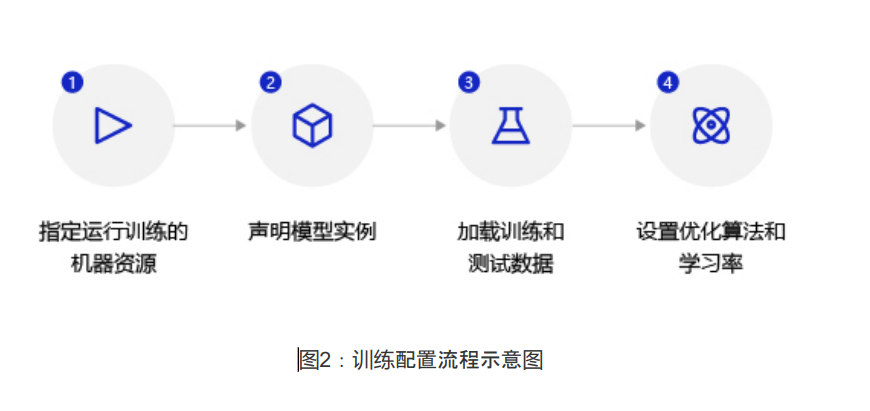

<p>• 声明定义好的回归模型实例为Regressor，并将模型的状态设置为 train 。
<p>• 使用 load_data 函数加载训练数据和测试数据。
<p>• 设置优化算法和学习率，优化算法采用随机梯度下降，学习率设置为0.01。

In [58]:
# 声明定义好的线性回归模型
model = Regressor()
# 开启模型训练模式
model.train()
# 加载数据
training_data, test_data = load_data()
# 定义优化算法，使用随机梯度下降SGD
# 学习率设置为0.01
opt = paddle.optimizer.SGD(learning_rate=0.01, parameters=model.parameters())

### 说明：


模型实例有两种状态：训练状态 .train() 和预测状态 .eval() 。训练时要执行正向计算和反向
传播梯度两个过程，而预测时只需要执行正向计算，为模型指定运行状态，有两点原因：
<p>1. 部分高级的算子在两个状态执行的逻辑不同，如：Dropout和BatchNorm（在后续的<br>
“计算机视觉”部分会详细介绍）；
<p>2. 从性能和存储空间的考虑，预测状态时更节省内存(无需记录反向梯度)，性能更好。


## 训练过程


训练过程采用二层循环嵌套方式：<br>
• 内层循环： 负责整个数据集的一次遍历，采用分批次方式（batch）。假设数据集
样本数量为1000，一个批次有10个样本，则遍历一次数据集的批次数量是1000/
10=100，即内层循环需要执行100次。

• 外层循环： 定义遍历数据集的次数，通过参数EPOCH_NUM设置。


***

### 说明:


batch size的取值会影响模型训练效果，batch size过大，会增大内存消耗和计算时间，且训练
效果并不会明显提升（每次参数只向梯度反方向移动一小步，因此方向没必要特别精确）；
batch size过小，样本数据没有统计意义，计算的梯度方向可能偏差较大。由于房价预测模型的
训练数据集较小，因此将batch size设置为10。


每次内层循环都需要执行如 **图3** 所示的步骤，计算过程与使用Python编写模型完全一致。

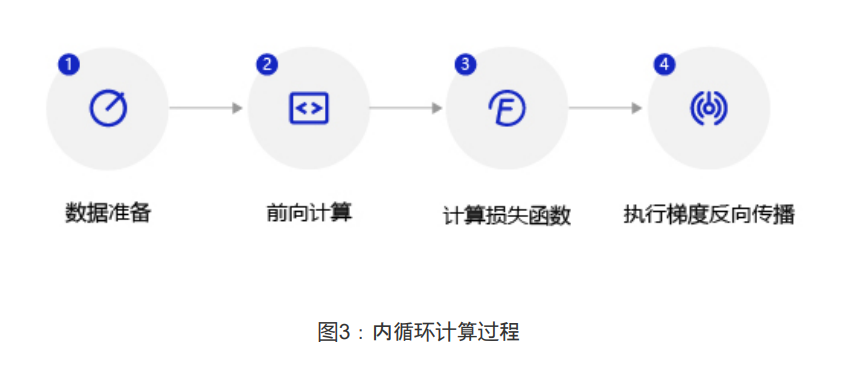

• 数据准备：将一个批次的数据先转换成nparray格式，再转换成张量格式。<br>
• 前向计算：将一个批次的样本数据灌入网络中，计算输出结果。<br>
• 计算损失函数：以前向计算结果和真实房价作为输入，通过square_error_cost API 计算损失函数。<br>
飞桨所有的API接口都有完整的说明和使用案例，可以登录飞桨官网API文档获取。<br>
• 反向传播：执行梯度反向传播 backward 函数，即从后到前逐层计算每一层的梯度，<br>
并根据设置的优化算法更新参数( opt.step 函数)。<br>


In [59]:
EPOCH_NUM = 10 # 设置外层循环次数
BATCH_SIZE = 10 # 设置batch大小
for epoch_id in range(EPOCH_NUM):
    # 在每轮迭代开始之前，将训练数据的顺序随机的打乱
    np.random.shuffle(training_data)
    # 将训练数据进行拆分，每个batch包含10条数据
    mini_batches = [training_data[k:k+BATCH_SIZE] for k in range(0, len(training_data), BATCH_SIZE)]
    # 定义内层循环
    for iter_id, mini_batch in enumerate(mini_batches):
        x = np.array(mini_batch[:, :-1]) # 获得当前批次训练数据
        y = np.array(mini_batch[:, -1:]) # 获得当前批次训练标签（真实房价）
        # 将numpy数据转为飞桨动态图tensor的格式
        house_features = paddle.to_tensor(x,dtype='float32')
        prices = paddle.to_tensor(y,dtype='float32')
        # 前向计算
        predicts = model(house_features)
        # 计算损失
        loss = F.square_error_cost(predicts, label=prices)
        avg_loss = paddle.mean(loss)
        if iter_id%20==0:
            print("epoch: {}, iter: {}, loss is: {}".format(epoch_id, iter_id, avg_loss.numpy()))
                    
        # 反向传播，计算每层参数的梯度值
        avg_loss.backward()
        # 更新参数，根据设置好的学习率迭代一步
        opt.step()
        # 清空梯度变量，以备下一轮计算
        opt.clear_grad()


epoch: 0, iter: 0, loss is: [1.2784107]
epoch: 0, iter: 20, loss is: [0.14273964]
epoch: 0, iter: 40, loss is: [0.05354111]
epoch: 1, iter: 0, loss is: [0.04871764]
epoch: 1, iter: 20, loss is: [0.13063705]
epoch: 1, iter: 40, loss is: [0.01335955]
epoch: 2, iter: 0, loss is: [0.04333347]
epoch: 2, iter: 20, loss is: [0.03873932]
epoch: 2, iter: 40, loss is: [0.04499817]
epoch: 3, iter: 0, loss is: [0.09903161]
epoch: 3, iter: 20, loss is: [0.1172039]
epoch: 3, iter: 40, loss is: [0.02889319]
epoch: 4, iter: 0, loss is: [0.11840393]
epoch: 4, iter: 20, loss is: [0.03022214]
epoch: 4, iter: 40, loss is: [0.0296276]
epoch: 5, iter: 0, loss is: [0.11205559]
epoch: 5, iter: 20, loss is: [0.0619397]
epoch: 5, iter: 40, loss is: [0.1086077]
epoch: 6, iter: 0, loss is: [0.09964292]
epoch: 6, iter: 20, loss is: [0.09103663]
epoch: 6, iter: 40, loss is: [0.25779602]
epoch: 7, iter: 0, loss is: [0.0514752]
epoch: 7, iter: 20, loss is: [0.1296276]
epoch: 7, iter: 40, loss is: [0.03868412]
epoch: 

## 模型保存和预测

### （1）保存模型

使用paddle.save API将模型当前的参数数据 model.state_dict() 保存到文件中，用于模型预测或
校验的程序调用

In [60]:
# 保存模型参数，文件名为LR_model.pdparams
paddle.save(model.state_dict(), 'LR_model.pdparams')
print("模型保存成功，模型参数保存在LR_model.pdparams中")

模型保存成功，模型参数保存在LR_model.pdparams中


***

### 说明：

为什么要执行保存模型操作，而不是直接使用训练好的模型进行预测？理论而言，直接使用模型
实例即可完成预测，但是在实际应用中，训练模型和使用模型往往是不同的场景。模型训练通常
使用大量的线下服务器（不对外向企业的客户/用户提供在线服务）；模型预测则通常使用线上
提供预测服务的服务器实现或者将已经完成的预测模型嵌入手机或其他终端设备中使用。因此本
教程中“先保存模型，再加载模型”的讲解方式更贴合真实场景的使用方法。m

### （2）模型预测


下面选择一条数据样本，测试下模型的预测效果。测试过程和在应用场景中使用模型的过程一
致，主要可分成如下三个步骤：

1. 配置模型预测的机器资源。本案例默认使用本机，因此无需写代码指定。
2. 将训练好的模型参数加载到模型实例中。由两个语句完成，第一句是从文件中读取
模型参数；第二句是将参数内容加载到模型。加载完毕后，需要将模型的状态调整
为 eval() （校验）。上文中提到，训练状态的模型需要同时支持前向计算和反向传
导梯度，模型的实现较为臃肿，而校验和预测状态的模型只需要支持前向计算，模
型的实现更加简单，性能更好。
3. 将待预测的样本特征输入到模型中，打印输出的预测结果。

通过 load_one_example 函数实现从数据集中抽一条样本作为测试样本，具体实现代码如下所
示

In [61]:
def load_one_example():
    # 从上边已加载的测试集中，随机选择一条作为测试数据
    idx = np.random.randint(0, test_data.shape[0])
    # idx = -10
    one_data, label = test_data[idx, :-1], test_data[idx, -1]
    # 修改该条数据shape为[1,13]
    one_data = one_data.reshape([1,-1])
    return one_data, label


In [62]:
# 参数为保存模型参数的文件地址
model_dict = paddle.load('LR_model.pdparams')
model.load_dict(model_dict)
model.eval()
# 参数为数据集的文件地址
one_data, label = load_one_example()
# 将数据转为动态图的variable格式
one_data = paddle.to_tensor(one_data,dtype="float32")
predict = model(one_data)
# 对结果做反归一化处理
predict = predict * (max_values[-1] - min_values[-1]) + min_values[-1]
# 对label数据做反归一化处理
label = label * (max_values[-1] - min_values[-1]) + min_values[-1]
print("Inference result is {}, the corresponding label is {}".format(predict.numpy(), label))

Inference result is [[17.70468]], the corresponding label is 23.700000762939453


# 基于飞桨高层API实现波士顿房价预测任务

飞桨高层API对飞桨API进行了进一步的封装，
提供了更加简洁易用的API，进一步提升了飞桨的易学易用性，并增强飞桨的功能。

基于飞桨高层API实现波士顿房价预测任务的代码实现如下:

In [63]:
import paddle
paddle.set_default_dtype("float32")

# 用高层API定义数据集，无需进行数据处理等，高层API为你一条龙搞定
train_dataset = paddle.text.datasets.UCIHousing(mode='train')
eval_dataset = paddle.text.datasets.UCIHousing(mode='test')

# 训练模型
model = paddle.Model(Regressor())
model.prepare(paddle.optimizer.SGD(learning_rate=0.005, parameters=model.parameters()),
            paddle.nn.MSELoss())
model.fit(train_dataset, eval_dataset, epochs=10, batch_size=8, verbose=1)

result = model.evaluate(eval_dataset, batch_size=8)
print("result:",result)

result_pred = model.predict(one_data, batch_size=1) # result_pred是一个list，元素数目对应模型的输出数目
result_pred = result_pred[0] # tuple,其中第一个值是个array
print("Inference result is {}, the corresponding label is {}".format(result_pred[0][0], label))

The loss value printed in the log is the current step, and the metric is the average value of previous steps.
Epoch 1/10
step 51/51 [==============================] - loss: 236.7291 - 2ms/step          
Eval begin...
step 13/13 [==============================] - loss: 107.2332 - 2ms/step          
Eval samples: 102
Epoch 2/10
step 51/51 [==============================] - loss: 29.5526 - 1ms/step           
Eval begin...
step 13/13 [==============================] - loss: 30.0061 - 2ms/step          
Eval samples: 102
Epoch 3/10
step 51/51 [==============================] - loss: 12.1722 - 1ms/step           
Eval begin...
step 13/13 [==============================] - loss: 15.4714 - 1ms/step             
Eval samples: 102
Epoch 4/10
step 51/51 [==============================] - loss: 15.7641 - 1ms/step          
Eval begin...
step 13/13 [==============================] - loss: 16.9044 - 1000us/step         
Eval samples: 102
Epoch 5/10
step 51/51 [==============================] - loss

• paddle.text.datasets.UCIHousing 用于获取数据。<br>
• paddle.Model 的 prepare 函数用于配制模型所需的部件，比如优化器 paddle.optimizer.SGD 、损失函数 paddle.nn.MSELoss 等。<br>
• paddle.Model 的 fit 函数用于输入训练集训练模型，在评估数据集给定时，会对当前模型进行评估。该函数还可以指定训练的轮次 epochs=5 ，训练数据或评估数据的批大小 batch_size=8 ，可视化的模型方式 verbose=1 。<br>
• paddle.Model 的 evaluate 函数用于在验证集上评估模型的损失函数值和评估指标。<br>
由于本例子没有定义评估指标，所以最后只输出损失函数值。<br>
• paddle.Model 的 predict 函数基于输入数据，得到模型的预测结果。<br>
• 这些高层API的接口会以更加简洁的代码完成模型的训练配置、训练过程和效果评估。如果不需要对模型训练过程做更精细化的调试和控制，使用高层API会更加方便。<br>

通过比较“模型预测值”和“真实房价”可见，模型的预测效果与真实房价接近。房价预测仅是一个
最简单的模型，使用飞桨编写均可事半功倍。那么对于工业实践中更复杂的模型，使用飞桨节约
的成本是不可估量的。同时飞桨针对很多应用场景和机器资源做了性能优化，在功能和性能上远
强于自行编写的模型

***
## 实验结果分析

利用飞浆平台构建模型更快，代码更简洁

## 实验总结

利用飞浆平台和利用Numpy构建模型有什么区别：
<p>1.功能和使用方式：飞浆平台主要用于处理连续变量（如自然语言处理任务中的文本分词、情感分析等），它提供了许多用于数值计算和优化的内置函数。例如，利用飞浆平台中的斜率插值方法（steepest-descent method）可以进行模型训练。Numpy则主要用于处理离散变量（如深度学习中的神经网络模型），提供了许多用于数值计算和矩阵运算的内置函数，如sum、mean、std等。</p>
<p>2.速度和精度：飞浆平台的主要目标是高效率的计算和执行，通常采用定点计算，具有高精度和低延迟的特点。而Numpy则采用浮点计算，具有更高的计算速度和更好的精度，但在一些特定情况下可能会受到限制。</p>
<p>3.代码复杂度：由于飞浆平台主要用于处理连续变量，因此其代码通常比较简洁，可读性较高。而Numpy则通常需要更多的代码来处理离散变量，因此其代码通常比较复杂。</p>
<p>4.标准化和异常值处理：飞浆平台中通常使用一些内置函数进行标准化和异常值处理，例如trimf（remove points that are both vertical and very near the x axis）和kurtosis（skewness）等。而Numpy则需要手动进行标准化和异常值处理。
数据存储：飞浆平台通常使用内置函数将数据存储在内存中，并可以随时读取和修改。而Numpy则需要手动将数据存储在磁盘上，并需要频繁进行数据传输和切换。</p>
<p>5.文档和社区支持：由于飞浆平台和Numpy在不同的应用领域中具有不同的功能和使用方式，因此它们的文档和社区支持也不尽相同。通常情况下，飞浆平台的文档更加详细和全面，而Numpy则较少。</p>



### 拓展作业

#### 基本知识

**1. 求导的链式法则**

链式法则是微积分中的求导法则，用于求一个复合函数的导数，是在微积分的求导运算中一种常用的方法。复合函数的导数将是构成复合这有限个函数在相应点的导数的乘积，就像锁链一样一环套一环，故称链式法则。如 **图1** 所示，如果求最终输出对内层输入（第一层）的梯度，等于外层梯度（第二层）乘以本层函数的梯度。
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/2beffa3f3d7c402685671b0825561a91c17216fe8b924f64b9f29a96f45cbc85" width="200" hegiht="" ></center>
<center><br>图1：求导的链式法则</br></center>
<br></br>

**2. 计算图的概念**

（1）为何是反向计算梯度？即梯度是由网络后端向前端计算。当前层的梯度要依据处于网络中后一层的梯度来计算，所以只有先算后一层的梯度才能计算本层的梯度。     

（2）案例：购买苹果产生消费的计算图。假设一家商店9折促销苹果，每个的单价100元。计算一个顾客总消费的结构如 **图2** 所示。
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/46c43ead4fa942f5be87f25538a046ff9456516816274cbcb5f6df3768c0fd34" width="400" hegiht="40" ></center>
<center><br>图2：购买苹果所产生的消费计算图</br></center>
<br></br>

*  前向计算过程：以黑色箭头表示，顾客购买了2个苹果，再加上九折的折扣，一共消费100\*2\*0.9=180元。
*  后向传播过程：以红色箭头表示，根据链式法则，本层的梯度计算 * 后一层传递过来的梯度，所以需从后向前计算。
 
最后一层的输出对自身的求导为1。导数第二层根据 **图3** 所示的乘法求导的公式，分别为0.9\*1和200\*1。同样的，第三层为100 * 0.9=90，2 * 0.9=1.8。
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/c251a2c290e946f99ce3a3381396c392b50e5a4243c346509bd91177b7f2da90" width="200"  ></center>
<center><br>图3：乘法求导的公式</br></center>
<br></br>

#### 作业题

根据 **图4** 所示的乘法和加法的导数公式，完成 **图5** 购买苹果和橘子的梯度传播的题目。
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/4ce8715f03f9477699707056544b1e6363f78aa09fda411d972878abb6d1d26f" width="300"  ></center>
<center><br>图4：乘法和加法的导数公式</br></center>
<br></br>

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/2fc6665e10f34f9e863172bb399862319f0914467d72457d9e7328616bdbe6df" width="500"  ></center>
<center><br>图5：购买苹果和橘子产生消费的计算图</br></center>
<br></br>  